<a href="https://colab.research.google.com/github/incable1560/MLF_228046_Ondrej_Hrozek/blob/main/MLF_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
n = 5

for i in range(1, 2*n):
    print("X " * (n - abs(n - i)))

X 
X X 
X X X 
X X X X 
X X X X X 
X X X X 
X X X 
X X 
X 


In [ ]:
input_str = "n45as29@#8ss6"

total = sum(int(ch) for ch in input_str if ch.isdigit())

print("Sum of digits:", total)

Sum of digits: 34


In [ ]:
n = 55

if n == 0:
    print("0")
else:

    is_negative = n < 0
    n = abs(n)
    binary_digits = ""
    while n > 0:
        remainder = n % 2
        binary_digits = str(remainder) + binary_digits
        n = n // 2

    if is_negative:
        binary_digits = "-" + binary_digits


    print("Binary:", binary_digits)

Binary: 110111


In [ ]:
def fibonacci(upper_threshold: int) -> list:
    if upper_threshold <= 0:
        return []

    fib_numbers = [0]

    if upper_threshold > 1:
        fib_numbers.append(1)

    while True:
        next_value = fib_numbers[-1] + fib_numbers[-2]

        if next_value >= upper_threshold:
            break

        fib_numbers.append(next_value)

    return fib_numbers

print(fibonacci(100))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


In [ ]:
import random

def rock_paper_scissors() -> None:
    choices = ["rock", "paper", "scissors"]

    computer_choice = random.choice(choices)
    user_choice = input("Enter rock, paper, or scissors: ").strip().lower()

    if user_choice not in choices:
        print("Invalid input")
        return

    print("Computer chose:", computer_choice)

    if user_choice == computer_choice:
        print("It is a tie")
    elif (
        (user_choice == "rock" and computer_choice == "scissors") or
        (user_choice == "paper" and computer_choice == "rock") or
        (user_choice == "scissors" and computer_choice == "paper")
    ):
        print("You win")
    else:
        print("You lose")


rock_paper_scissors()

Enter rock, paper, or scissors: PAPER
Computer chose: scissors
You lose


In [ ]:
import numpy as np
import time


def create_array_nxn(n: int) -> np.ndarray:
    if n <= 0:
        raise ValueError("n must be a positive integer")

    return np.arange(n*n - 1, -1, -1).reshape(n, n)


def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
    result = arr.copy()

    rows, cols = result.shape
    for i in range(rows):
        for j in range(cols):
            if result[i, j] < threshold:
                result[i, j] = 0

    return result


def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
    result = arr.copy()
    result[result < threshold] = 0
    return result


def compare_performance(n: int, threshold: int) -> None:
    arr = create_array_nxn(n)

    # Loop-based timing
    start_loop = time.time()
    apply_threshold_loop(arr, threshold)
    end_loop = time.time()

    # Vectorized timing
    start_vec = time.time()
    apply_threshold_vectorized(arr, threshold)
    end_vec = time.time()

    print(f"Loop execution time: {end_loop - start_loop:.6f} seconds")
    print(f"Vectorized execution time: {end_vec - start_vec:.6f} seconds")

compare_performance(1000, 500000)

Loop execution time: 0.322878 seconds
Vectorized execution time: 0.003240 seconds


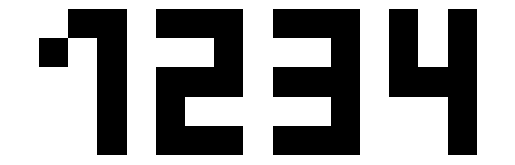

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


nums = {
    "1": np.array([[0, 1, 1],
                   [1, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1]]),

    "2": np.array([[1, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1],
                   [1, 0, 0],
                   [1, 1, 1]]),

    "3": np.array([[1, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1]]),

    "4": np.array([[1, 0, 1],
                   [1, 0, 1],
                   [1, 1, 1],
                   [0, 0, 1],
                   [0, 0, 1]]),

    "5": np.array([[1, 1, 1],
                   [1, 0, 0],
                   [1, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1]]),

    "6": np.array([[1, 1, 1],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]]),

    "7": np.array([[1, 1, 1],
                   [0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1]]),

    "8": np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]]),

    "9": np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1]]),

    "0": np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 0, 1],
                   [1, 0, 1],
                   [1, 1, 1]])
}


def show_in_digi(input_integer: int) -> None:
    digits = str(input_integer)

    arrays = []
    for d in digits:
        if d not in nums:
            raise ValueError("Input must contain only digits 0–9")
        arrays.append(nums[d])

    strip = np.zeros((5, 1))

    final_image = strip

    for arr in arrays:
        final_image = np.concatenate((final_image, arr, strip), axis=1)

    plt.imshow(final_image, cmap="gray_r")
    plt.axis("off")
    plt.show()
show_in_digi(1234)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing()
dataset = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add target column (median house value)
dataset["MedHouseVal"] = housing.target

dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [60]:
dataset[dataset["AveBedrms"] > 310]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


In [ ]:
dataset_dropped = dataset.iloc[1:-1]
dataset_dropped.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697


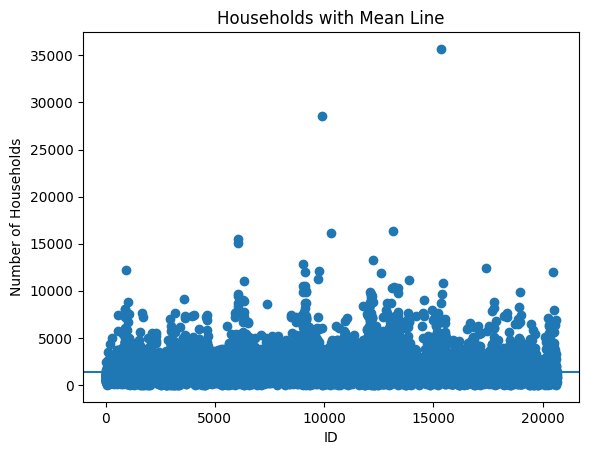

In [ ]:
households = dataset["Population"]
mean_households = households.mean()

plt.figure()
plt.scatter(dataset.index, households)
plt.axhline(mean_households)
plt.xlabel("ID")
plt.ylabel("Number of Households")
plt.title("Households with Mean Line")
plt.show()

In [ ]:
print(dataset.isna().sum())

# Replace NaN with column means
dataset_filled = dataset.fillna(dataset.mean())

print(dataset_filled.isna().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


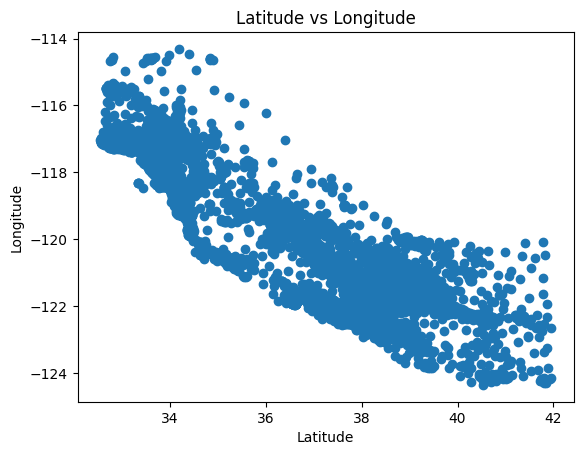

In [ ]:
plt.figure()
plt.scatter(dataset["Latitude"], dataset["Longitude"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude vs Longitude")
plt.show()

In [ ]:
cols = ["MedInc", "HouseAge"]

dataset_norm = dataset.copy()

for col in cols:
    dataset_norm[col] = (dataset[col] - dataset[col].min()) / (dataset[col].max() - dataset[col].min())

dataset_norm[cols].head()

,MedInc,HouseAge
0,0.539668,0.784314
1,0.538027,0.392157
2,0.466028,1.000000
3,0.354699,1.000000
4,0.230776,1.000000
